In [ ]:
import sys

sys.path.append("../")
from sgm.modules.lipreader.lightnining import ModelModule
import torch


def get_lightning_module(ckpt_path):
    modelmodule = ModelModule()
    modelmodule.model.load_state_dict(torch.load(ckpt_path, map_location=lambda storage, loc: storage))
    return modelmodule


ckpt_path = "/data/home/antoni/code/generative-models/checkpoints/vsr_trlrs3_base.max400.pth"
model = get_lightning_module(ckpt_path)
model.eval()

In [ ]:
import sys

sys.path.append("../")
import numpy as np
import torch
import torchvision
from sgm.modules.lipreader.preparation.detectors.retinaface.video_process import VideoProcess
from sgm.modules.lipreader.datamodule.transforms import VideoTransform

video_transform = VideoTransform(subset="val", max_noise_level=250, center_crop_size=11)
video_process = VideoProcess(
    convert_gray=False, crop_width=96 // 8, crop_height=96 // 8, reference_size=(64, 64), target_size=(64, 64)
)
video_path = "/fsx/rs2517/data/HDTF/cropped_videos_original/RD_Radio18_000.mp4"
video = torchvision.io.read_video(video_path, pts_unit="sec", output_format="TCHW")[0]
or_shape = video.shape[-2:]
video = torch.nn.functional.interpolate(video, size=(64, 64)).permute(0, 2, 3, 1).numpy()
print(video.shape)
landmarks = np.load("/fsx/rs2517/data/HDTF/cropped_videos_original/RD_Radio18_000.npy")

In [ ]:
pad = 10
xmouthpoints = (crop // 8)[48:67, 0]
ymouthpoints = (crop // 8)[48:67, 1]
maxx = np.max(xmouthpoints)
minx = np.min(xmouthpoints)
maxy = np.max(ymouthpoints)
miny = np.min(ymouthpoints)
print(maxx, minx, maxy, miny)
print(miny - pad, maxy + pad, minx - pad, maxx + pad)

In [ ]:
_, crop = video_process.crop_patch(video, landmarks, return_bbox=True, threshold=30)

In [ ]:
crop

In [1]:
import sys

sys.path.append("../")
from sgm.data.data_utils import scale_landmarks
import numpy as np
import torch
import torchvision
from sgm.modules.lipreader.preparation.detectors.retinaface.video_process import VideoProcess
from sgm.modules.lipreader.datamodule.transforms import VideoTransform


from sgm.modules.lipreader.lightnining import ModelModule
import torch


video_transform = VideoTransform(subset="loss", max_noise_level=250)
video_process = VideoProcess(convert_gray=False)

video_path = "/fsx/rs2517/data/HDTF/cropped_videos_original/RD_Radio18_000.mp4"
video = torchvision.io.read_video(video_path, pts_unit="sec", output_format="TCHW")[0]
or_shape = video.shape[-2:]
video = torch.nn.functional.interpolate(video, size=(512, 512)).permute(0, 2, 3, 1)

landmarks = np.load("/fsx/rs2517/data/HDTF/cropped_videos_original/RD_Radio18_000.npy")
landmarks = scale_landmarks(landmarks, (or_shape[0], or_shape[1]), (512, 512))

/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
video.shape, landmarks.shape

(torch.Size([1825, 512, 512, 3]), (1825, 68, 2))

In [2]:
video_proccessed = video_process(
    (video[:14].cuda().permute(0, 3, 1, 2) / 255.0) * 2 - 1, torch.from_numpy(landmarks[:14]).float().cuda(), True
)
video_proccessed.shape

RuntimeError: No CUDA GPUs are available

In [3]:
# video_proccessed = video_process((video / 255.0) * 2 - 1, landmarks, True)
# print(video_proccessed.shape)
# video_proccessed = video_proccessed.permute((0, 3, 1, 2))
video_proccessed, t = video_transform(video_proccessed)
print(video_proccessed.shape, t)

torch.Size([14, 1, 88, 88]) tensor([0])


In [6]:
def get_lightning_module(ckpt_path):
    modelmodule = ModelModule()
    modelmodule.model.load_state_dict(torch.load(ckpt_path, map_location=lambda storage, loc: storage))
    return modelmodule


ckpt_path = "/data/home/antoni/code/generative-models/checkpoints/vsr_trlrs3_base.max400.pth"
model = get_lightning_module(ckpt_path)
model.eval()

ModelModule(
  (model): E2E(
    (encoder): Encoder(
      (to_timestep_cond): Sequential(
        (0): SinusoidalPosEmb()
        (1): Linear(in_features=64, out_features=256, bias=True)
        (2): SiLU()
      )
      (frontend): Conv3dResNetTimeConditioned(
        (trunk): ResNet(
          (layer1): mySequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (relu1): SiLU(inplace=True)
              (relu2): SiLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (1): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn

In [ ]:
video_proccessed = video_process(video, landmarks, True, threshold=30)
video_proccessed = torch.tensor(video_proccessed)
video_proccessed = video_proccessed.permute((0, 3, 1, 2))
video_proccessed, t = video_transform(video_proccessed)
t

In [ ]:
video_proccessed.max(), video_proccessed.min()

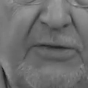

'L'

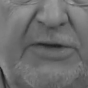

'L'

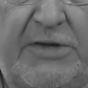

'L'

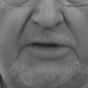

'L'

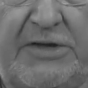

'L'

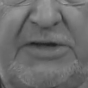

'L'

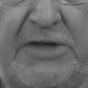

'L'

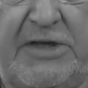

'L'

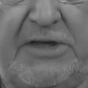

'L'

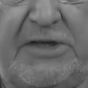

'L'

In [4]:
from PIL import Image

# Display first 10 frames video
for i in range(10):
    pil_image = (video_proccessed[i].permute(1, 2, 0).numpy() * 255).astype(np.uint8)

    display(Image.fromarray(pil_image.squeeze()), "L")

In [5]:
model = model.to("cpu")
with torch.no_grad():
    print(model(video_proccessed[:10], extract_position="conformer").shape)

NameError: name 'model' is not defined

In [7]:
model = model
duration = 15


with torch.no_grad():
    input = video_proccessed[: 25 * duration]

    pred_noise = model(input.to(torch.float32), t=None)
    print(pred_noise)

    # pred = model(input, t=None)
    # print(pred)

SYSTEM


In [ ]:
import torchaudio


def compute_word_level_distance(seq1, seq2):
    return torchaudio.functional.edit_distance(seq1.lower().split(), seq2.lower().split())